**DATASET ORIGINALLY TAKEN FROM KAGGLE : https://www.kaggle.com/saisaathvik/used-bikes-prices-in-india**

### OBJECTIVE - To Predict the 'PRICE' of the used bikes based on different features.

## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Used_Bikes.csv')
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha


In [3]:
df.shape

(32648, 8)

In [4]:
df.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bike_name   32648 non-null  object
 1   price       32648 non-null  int64 
 2   city        32648 non-null  object
 3   kms_driven  32648 non-null  int64 
 4   owner       32648 non-null  object
 5   age         32648 non-null  int64 
 6   power       32648 non-null  int64 
 7   brand       32648 non-null  object
dtypes: int64(4), object(4)
memory usage: 2.0+ MB


In [6]:
df.isna().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

**NO NULL VALUES IN OUR DATASET**

***Since first column is same as Last column, We can drop first column***

In [7]:
df.drop('bike_name',axis=1,inplace=True)

In [8]:
df_new  = df.copy() 

In [9]:
df_new['brand'].value_counts()[df_new['brand'].value_counts() > 500]

Bajaj              11213
Hero                6368
Royal Enfield       4178
Yamaha              3916
Honda               2108
Suzuki              1464
TVS                 1247
KTM                 1077
Harley-Davidson      737
Name: brand, dtype: int64

In [10]:
df_new

,price,city,kms_driven,owner,age,power,brand
0,35000,Ahmedabad,17654,First Owner,3,110,TVS
1,119900,Delhi,11000,First Owner,4,350,Royal Enfield
2,600000,Delhi,110,First Owner,8,675,Triumph
3,65000,Bangalore,16329,First Owner,4,180,TVS
4,80000,Bangalore,10000,First Owner,3,150,Yamaha
...,...,...,...,...,...,...,...
32643,39000,Delhi,22000,First Owner,4,100,Hero
32644,30000,Karnal,6639,First Owner,9,180,TVS
32645,60000,Delhi,20373,First Owner,6,220,Bajaj
32646,15600,Jaipur,84186,First Owner,16,125,Hero


***Dropping all the brands which has less than 500 occurances.***

In [11]:
df_new = df_new.groupby('brand').filter(lambda x: len(x)>500)

***Dropping all the cities which has less than 600 occurances.***

In [12]:
df_new = df_new.groupby('city').filter(lambda x: len(x)a>600)

In [13]:
df_new['owner'].value_counts()

First Owner             27876
Second Owner             2345
Third Owner                69
Fourth Owner Or More       10
Name: owner, dtype: int64

**REPLACING ALL THE SECOND, THIRD, FOURTH AND MORE OWNERS TO 'SECOND OWNER OR MORE'**

In [14]:
df_new['owner'].replace(['Second Owner','Third Owner','Fourth Owner Or More'],'Second Owner or more',inplace=True)
df_new['owner'].value_counts()

First Owner             27876
Second Owner or more     2424
Name: owner, dtype: int64

## TREATING OUTLIERS

In [15]:
min_value = df_new['price'].mean() - 3*df_new['price'].std()
max_value = df_new['price'].mean() + 3*df_new['price'].std()
df_new = df_new[(df_new['price'] > min_value) & (df_new['price'] < max_value)]

In [16]:
min_value = df_new['power'].mean() - 3*df_new['power'].std()
max_value = df_new['power'].mean() + 3*df_new['power'].std()
df_new = df_new[(df_new['power'] > min_value) & (df_new['power'] < max_value)]

In [17]:
min_value = df_new['kms_driven'].mean() - 3*df_new['kms_driven'].std()
max_value = df_new['kms_driven'].mean() + 3*df_new['kms_driven'].std()
df_new = df_new[(df_new['kms_driven'] > min_value) & (df_new['kms_driven'] < max_value)]

In [18]:
min_value = df_new['age'].mean() - 3*df_new['age'].std()
max_value = df_new['age'].mean() + 3*df_new['age'].std()
df_new = df_new[(df_new['age'] > min_value) & (df_new['age'] < max_value)]

In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29174 entries, 0 to 32647
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   price       29174 non-null  int64 
 1   city        29174 non-null  object
 2   kms_driven  29174 non-null  int64 
 3   owner       29174 non-null  object
 4   age         29174 non-null  int64 
 5   power       29174 non-null  int64 
 6   brand       29174 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.8+ MB


## EDA

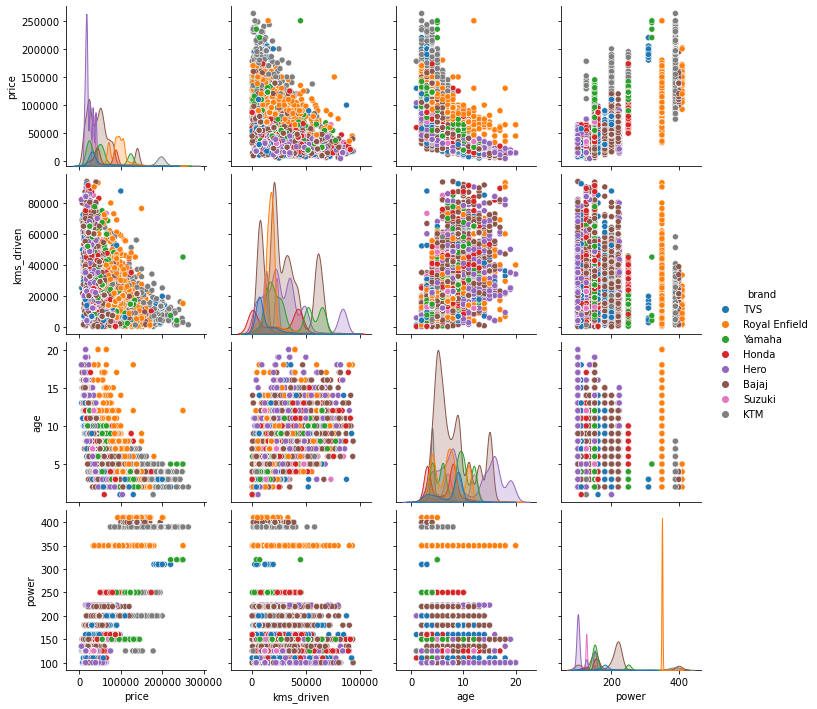

In [20]:
sns.pairplot(df_new,hue='brand')

**From the Pairplot we can conclude that there is some positive relation between price and power , and a negative relationship between price and age, and price and kms_driven**

In [21]:
sns.set_style('darkgrid')

<AxesSubplot:>

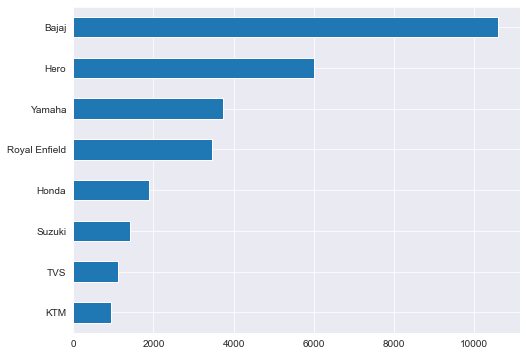

In [22]:
plt.figure(figsize=(8,6))
df_new['brand'].value_counts().sort_values().plot(kind="barh")

<AxesSubplot:ylabel='brand'>

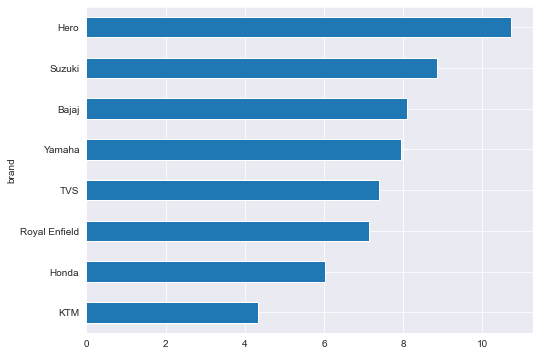

In [23]:
plt.figure(figsize=(8,6))
df_new.groupby('brand')['age'].mean().sort_values().plot(kind="barh")

<AxesSubplot:ylabel='brand'>

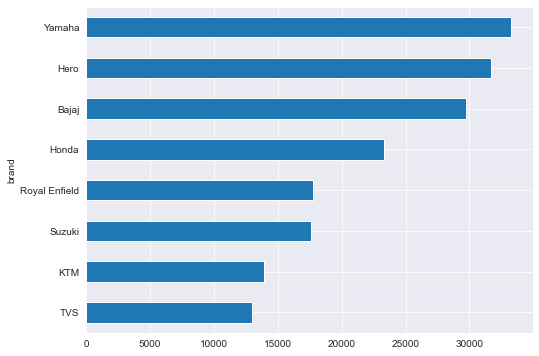

In [24]:
plt.figure(figsize=(8,6))
df_new.groupby('brand')['kms_driven'].mean().sort_values().plot(kind="barh")

<AxesSubplot:ylabel='brand'>

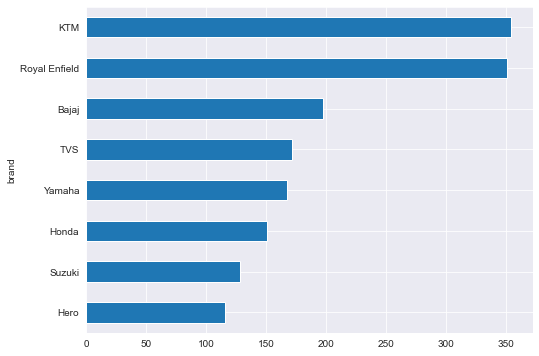

In [25]:
plt.figure(figsize=(8,6))
df_new.groupby('brand')['power'].mean().sort_values().plot(kind="barh")

<AxesSubplot:>

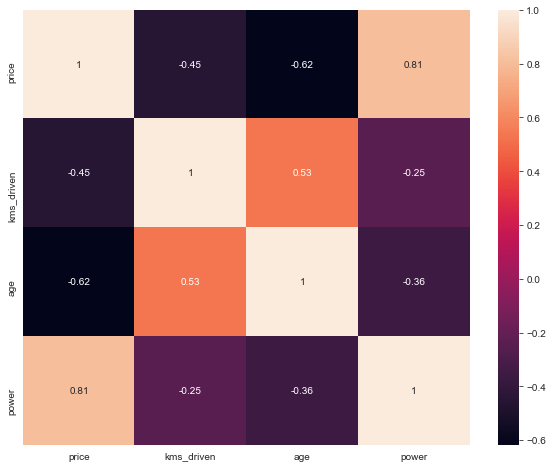

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(),annot=True)

**From the Heatmap it can be easily concluded that Power and Price are highly positively correlated**

## TURNING CATEGORIES INTO INTEGERS

In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29174 entries, 0 to 32647
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   price       29174 non-null  int64 
 1   city        29174 non-null  object
 2   kms_driven  29174 non-null  int64 
 3   owner       29174 non-null  object
 4   age         29174 non-null  int64 
 5   power       29174 non-null  int64 
 6   brand       29174 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.8+ MB


In [28]:
df_new = pd.get_dummies(data=df_new,columns=['city','owner','brand'], drop_first=True)

In [29]:
df_new.head()

,price,kms_driven,age,power,city_Allahabad,city_Bangalore,city_Bhopal,city_Chennai,city_Delhi,city_Faridabad,...,city_Pune,city_Rupnagar,owner_Second Owner or more,brand_Hero,brand_Honda,brand_KTM,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Yamaha
0,35000,17654,3,110,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,119900,11000,4,350,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,65000,16329,4,180,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,80000,10000,3,150,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,53499,25000,6,150,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29174 entries, 0 to 32647
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   price                       29174 non-null  int64
 1   kms_driven                  29174 non-null  int64
 2   age                         29174 non-null  int64
 3   power                       29174 non-null  int64
 4   city_Allahabad              29174 non-null  uint8
 5   city_Bangalore              29174 non-null  uint8
 6   city_Bhopal                 29174 non-null  uint8
 7   city_Chennai                29174 non-null  uint8
 8   city_Delhi                  29174 non-null  uint8
 9   city_Faridabad              29174 non-null  uint8
 10  city_Gautam Buddha Nagar    29174 non-null  uint8
 11  city_Ghaziabad              29174 non-null  uint8
 12  city_Godhara                29174 non-null  uint8
 13  city_Gurgaon                29174 non-null  uint8
 14  city_H

## TRAIN TEST SPLIT

In [31]:
X = df_new.drop('price',axis=1)
y = df_new.price

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
X.shape , y.shape

((29174, 33), (29174,))

# LINEAR REGRESSION

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()

In [37]:
lr.fit(X_test,y_test)

LinearRegression()

In [38]:
from sklearn.metrics import mean_squared_error,r2_score

In [39]:
lr.score(X_test,y_test)

0.9417562052856797

In [40]:
y_pred = lr.predict(X_test)

In [41]:
mse = mean_squared_error(y_test,y_pred)
print('The Mean Squared error is : ', mse)
print('The Root Mean Squared error is : ', np.sqrt(mse))
print('The R2 Score is : ', r2_score(y_test,y_pred))

The Mean Squared error is :  94294710.25540666
The Root Mean Squared error is :  9710.546341756815
The R2 Score is :  0.9417562052856797


In [42]:
residual = y_test - y_pred

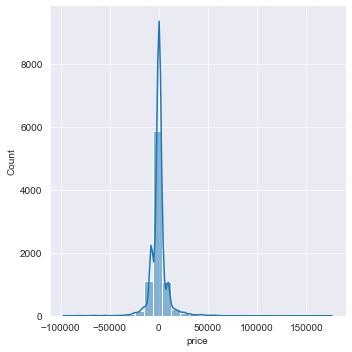

In [43]:
sns.displot(residual,bins=30,kde = True )

In [44]:
r2_lr = r2_score(y_test,y_pred)

# Polynomial Regression

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
train_rmse_error = []
test_rmse_error = []

for d in range(1,4):
    poly_conv = PolynomialFeatures(degree=d,include_bias=False)
    poly_feat = poly_conv.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=42)
    
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    train_pred = lr.predict(X_train)
    test_pred = lr.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)
    

In [47]:
train_rmse_error , test_rmse_error

([9339.199602627568, 6479.561924418461, 5845.892601577887],
 [9740.604917653547, 6858.182353905837, 8222.263645558347])

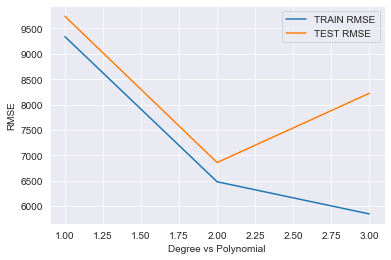

In [48]:
plt.plot(range(1,4),train_rmse_error[:3],label = "TRAIN RMSE")
plt.plot(range(1,4),test_rmse_error[:3],label = "TEST RMSE")
plt.xlabel('Degree vs Polynomial')
plt.ylabel('RMSE')
plt.legend()

In [49]:
final_poly_conv = PolynomialFeatures(degree=2,include_bias=False)

In [50]:
final_poly_feat = final_poly_conv.fit_transform(X)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(final_poly_feat, y, test_size=0.3, random_state=42)

In [52]:
final_lr = LinearRegression()

In [53]:
final_lr.fit(X_train,y_train)

LinearRegression()

In [54]:
y_pred = final_lr.predict(X_test)

In [55]:
mse = mean_squared_error(y_test,y_pred)
print('The Mean Squared error is : ', mse)
print('The Root Mean Squared error is : ', np.sqrt(mse))
print('The R2 Score is : ', r2_score(y_test,y_pred))

The Mean Squared error is :  47034665.19942541
The Root Mean Squared error is :  6858.182353905837
The R2 Score is :  0.9709477087642353


In [56]:
r2_pr = r2_score(y_test,y_pred)

# KNN REGRESSOR

### SCALING FOR KNN

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [59]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [60]:
from sklearn.neighbors import KNeighborsRegressor

In [61]:
error_rate = []

for i in range(1,20):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(scaled_X_train,y_train)
    pred_i = knr.predict(scaled_X_test)
    
    error_rate.append(mean_squared_error(y_test,pred_i))

Text(0, 0.5, 'Error')

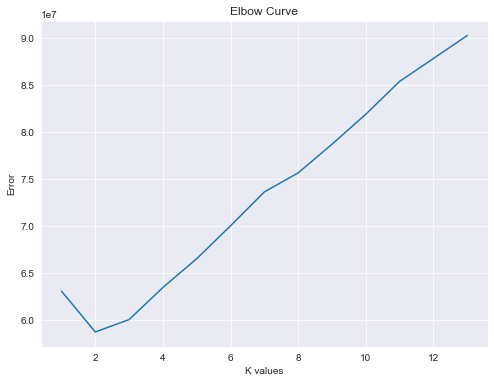

In [62]:
plt.figure(figsize=(8,6))
plt.plot(range(1,14), error_rate[:13])
plt.title('Elbow Curve')
plt.xlabel('K values')
plt.ylabel('Error')

***From the Elbow Curve we can easily conclude that error is minimum at K=2, so therefore we select the lowest i.e K=2***

In [63]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(scaled_X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [64]:
y_pred = knr.predict(scaled_X_test)

In [65]:
mse = mean_squared_error(y_test,y_pred)
print('The Mean Squared error is : ', mse)
print('The Root Mean Squared error is : ', np.sqrt(mse))
print('The R2 Score is : ', r2_score(y_test,y_pred))

The Mean Squared error is :  58742209.426710844
The Root Mean Squared error is :  7664.346640563098
The R2 Score is :  0.9637162129492965


In [66]:
r2_knr = r2_score(y_test,y_pred)

# DECISION TREE REGRESSOR

In [67]:
from sklearn.tree import DecisionTreeRegressor , plot_tree

In [68]:
dtree = DecisionTreeRegressor()

In [69]:
r2 = []
# max_depth = []

for i in range(1,21):
    dtree = DecisionTreeRegressor(max_depth=i)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    
    r2.append(r2_score(y_test,y_pred))

Text(0, 0.5, 'Error')

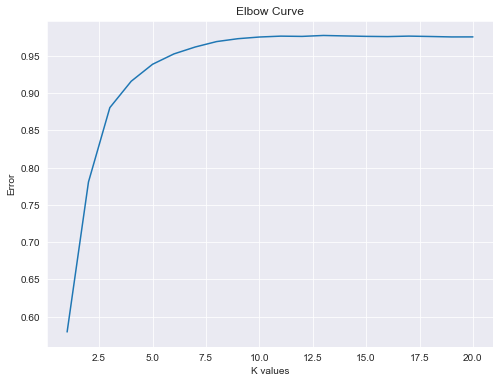

In [70]:
plt.figure(figsize=(8,6))
plt.plot(range(1,len(r2)+1), r2)
plt.title('Elbow Curve')
plt.xlabel('K values')
plt.ylabel('Error')

In [71]:
dff = pd.DataFrame(index = range(1,len(r2)+1) , data = r2,columns=['R2 Score'])

In [72]:
dff.sort_values(ascending=False , by = 'R2 Score').head()

,R2 Score
13,0.977238
14,0.976613
17,0.976367
11,0.976334
15,0.976026


In [73]:
print('Therefore Max R2 score is {} at Max_depth {}'.format(round(max(dff['R2 Score']),4),dff['R2 Score'].idxmax() ))

Therefore Max R2 score is 0.9772 at Max_depth 13


In [74]:
dtree = DecisionTreeRegressor(max_depth=11)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=11)

In [77]:
y_pred = dtree.predict(X_test)

In [78]:
mse = mean_squared_error(y_test,y_pred)
print('The Mean Squared error is : ', mse)
print('The Root Mean Squared error is : ', np.sqrt(mse))
print('The R2 Score is : ', r2_score(y_test,y_pred))

The Mean Squared error is :  37440686.14654345
The Root Mean Squared error is :  6118.879484557891
The R2 Score is :  0.976873701271514


In [79]:
r2_dtr = r2_score(y_test,y_pred)

# RANDOM FOREST REGRESSOR

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [81]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [82]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [83]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(oob_score=True)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Shobhit\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.97682847 0.96259432        nan        nan 0.9587167         nan
        nan        nan        nan        nan 0.97639829        nan
        nan        nan        nan        nan        nan 0.97703337
        nan 0.97720244        nan        nan 0.96990571 0.97747565
        nan        nan        nan 0.9740518         nan 0.97412329
        nan        nan        nan 0.96970229 0.97006307        nan
 0.9741401  0.97711018 0.97742571 0.97449669 0.97416252 0.97335656
 0.97003168 0.96965136        nan 0.97717985 0.9774704         nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.97450676 0.97739748 0.9771688  0.97357583
 0.97702102 0.95888699        nan        nan 0.97550622 0.97729173
        nan 0.97743439        nan        nan        nan        nan
 0.97440216        nan 0.9772659         nan 0.9758

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(oob_score=True),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [84]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [85]:
rf = RandomForestRegressor(n_estimators= 800,
 min_samples_split = 5,
 min_samples_leaf = 2,
 max_features = 'auto',
 max_depth = None,
 bootstrap = True)

In [86]:
rf.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=800)

In [87]:
y_pred = rf.predict(X_test)

In [88]:
mse = mean_squared_error(y_test,y_pred)
print('The Mean Squared error is : ', mse)
print('The Root Mean Squared error is : ', np.sqrt(mse))
print('The R2 Score is : ', r2_score(y_test,y_pred))

The Mean Squared error is :  31224629.615220927
The Root Mean Squared error is :  5587.900286800125
The R2 Score is :  0.9807132243960065


In [89]:
r2_rfr = r2_score(y_test,y_pred)

## MODEL COMPARISON

In [90]:
print('R2 score of Linear Regression is :', r2_lr)
print('R2 score of Polynomial Regression is :', r2_pr)
print('R2 score of KNN Regressor is :', r2_knr)
print('R2 score of Decision Tree Regressor is :', r2_dtr)
print('R2 score of Random Forest Regressor is :', r2_rfr)

R2 score of Linear Regression is : 0.9417562052856797
R2 score of Polynomial Regression is : 0.9709477087642353
R2 score of KNN Regressor is : 0.9637162129492965
R2 score of Decision Tree Regressor is : 0.976873701271514
R2 score of Random Forest Regressor is : 0.9807132243960065


In [91]:
dict = {'Linear Regression' : r2_lr,
        'Polynomial Regression' : r2_pr,
       'KNN Regressor':r2_knr,
       'Decision Tree Regressor':r2_dtr,
       'Random Forest Regressor': r2_rfr}

In [92]:
dff = pd.DataFrame(index= dict.keys(), data = dict.values(), columns=['R2 Scores']).sort_values(by=['R2 Scores'],ascending= False)

In [93]:
dff

,R2 Scores
Random Forest Regressor,0.980713
Decision Tree Regressor,0.976874
Polynomial Regression,0.970948
KNN Regressor,0.963716
Linear Regression,0.941756


In [94]:
dff.head(1)

,R2 Scores
Random Forest Regressor,0.980713


In [95]:
print('THEREFORE THE BEST MODEL IS "{}" \nWITH AN R2 SCORE OF "{}"'.format(dff['R2 Scores'].idxmax(), round(dff['R2 Scores'].max(),4)))

THEREFORE THE BEST MODEL IS "Random Forest Regressor" 
WITH AN R2 SCORE OF "0.9807"
